In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\sahar\\OneDrive\\Desktop\\Academic_LPU\\5th Sem\\INT 234\\AIML Dataset.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

from above analysis we able to conclude that our dataset has no error value is already clear dataset so, we can move forward with this dataset


In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Here we are able to see if fraud is done or not and also we are able to see the number of fraud done and not done 

In [8]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

Here we are able to see the system is able to detected the fraud or not and also the count of isflaggedFraud done 
isflaggedfraud show system is able to detect the fraud or not it simply flagged the fraude if it found something unexpected or abnormal activities 

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
round((df['isFraud'].value_counts()[1] / df.shape[0])*100, 2)

np.float64(0.13)

Here we are able to see the percentage of fraud is done and the value is round off upto 2 digits
df.shape show the count of all the rows in the dataset 

In [11]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Visualization 

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylable'

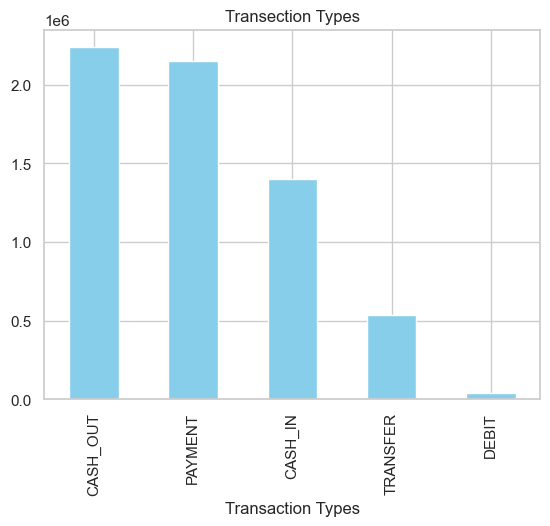

In [12]:
df['type'].value_counts().plot(kind="bar", title="Transection Types", color="skyblue")
plt.xlabel("Transaction Types")
plt.ylable("Counts")
plt.show()

In [ ]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by Type", color="salmon")
plt.ylabel("fraud Bar")
plt.show()

In [ ]:
df['amount'].describe().astype(int)

In [ ]:
#Histogram plot
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color="green")
plt.title("Transection Amount distribution (log Scaled)")
plt.xlabel("Log (Amount + 1)")
plt.show()

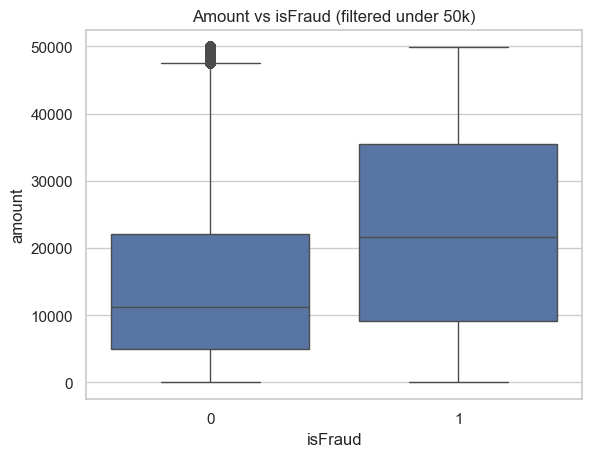

In [13]:
# Relation between fraud and amount
sns.boxplot(data= df[df['amount'] < 50000], x = 'isFraud', y='amount')
plt.title("Amount vs isFraud (filtered under 50k)")
plt.show()

so, from here we can see that for the higher amount which filterd under 50k we have more fraud rates.
and the lower mean on the non fraud side 

In [14]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
# Balance chain and Anomalies
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] =df['oldbalanceDest'] - df['newbalanceDest']
(df['balanceDiffOrig'] < 0).sum()
(df['balanceDiffDest'] < 0).sum()
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


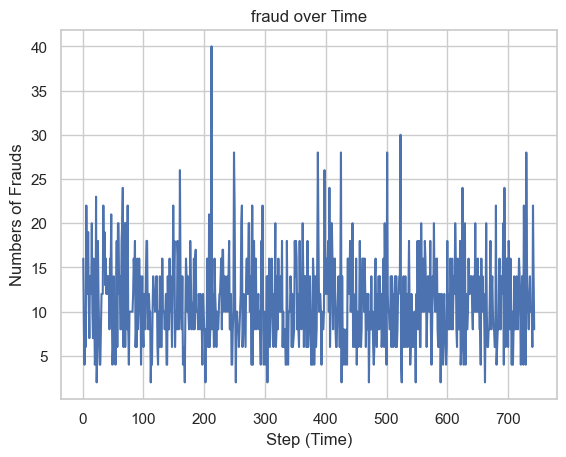

In [18]:
frauds_per_step = df[df['isFraud'] == 1] ['step'].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label= "Frauds per step")
plt.xlabel("Step (Time)")
plt.ylabel("Numbers of Frauds")
plt.title("fraud over Time")
plt.grid(True)
plt.show()

from the above chart we get our data is non-time dependent so we can drop this column 

In [20]:
df.drop(columns="step", inplace=True)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [23]:
# Top money sender 
top_sender = df['nameOrig'].value_counts().head(10)
top_sender


nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

we have this the three genrally let's see if we have equality on the top recivers too

In [25]:
# Top Recivers
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

so, we don't have a equality on this side and customers wise we can see taht who takes the highest amount of transactions.

In [32]:
fraud_user = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)

In [33]:
fraud_user

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [42]:
fraud_types = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])]
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

In [43]:
fraud_types['type'].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

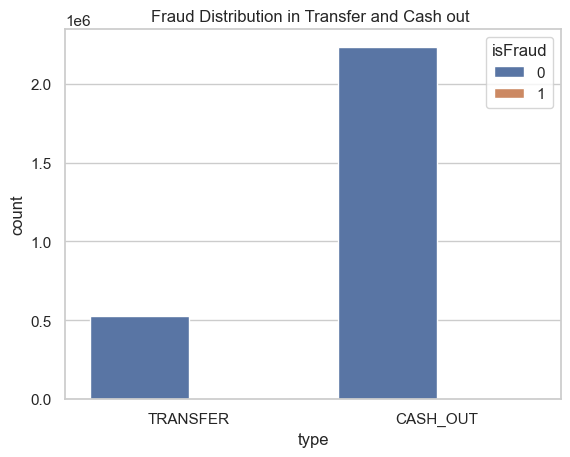

In [44]:
sns.countplot(data = fraud_types, x = 'type', hue='isFraud')
plt.title("Fraud Distribution in Transfer and Cash out ")
plt.show()

since we have a low fraud values we can not even see the orange, but we can see cash_out dominates this chart 

In [45]:
# Correlatio Matrix 
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

In [46]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


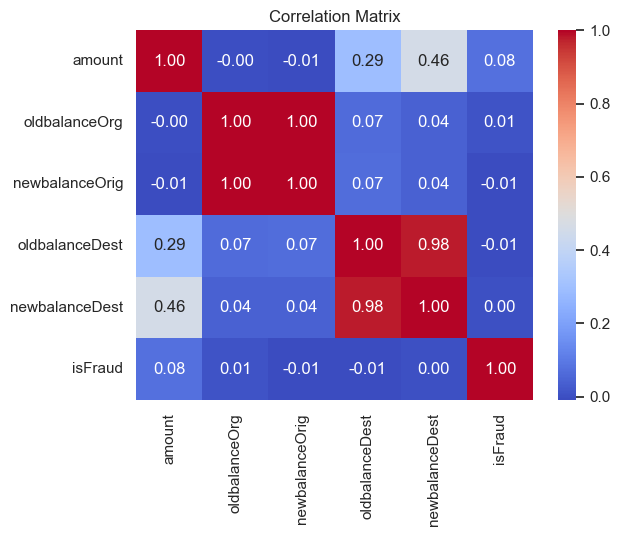

In [47]:
# using seaborn for heatmap 
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

from above heatmap we can able to see the strong correlation between newbalancedest and oldbalancedest 

In [48]:
# filter the customer who has balance and after the transfer they go to zero 
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0) &
    (df['newbalanceOrig'] == 0) &
    (df['type'].isin(['TRANSFER', 'CASH_OUT']))
    ]


In [49]:
len(zero_after_transfer)

1188074

In [50]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,-46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,-2712905.89


In [51]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

# Future Engineering/selection and preparation 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [54]:
# we drop some columns which is not in use 
df_model= df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

In [55]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [64]:
df_model.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'balanceDiffOrig', 'balanceDiffDest'],
      dtype='object')

In [65]:
categorical = ['type']
numeric = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest']


In [66]:
y = df_model['isFraud']
x = df_model.drop('isFraud', axis=1)


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

In [68]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(drop = "first"),
         categorical)
    ],
    remainder = "drop"
)



In [70]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(class_weight = "balanced", max_iter = 1000))
])

In [72]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [73]:
pipeline.predict(x_test)
y_pred = pipeline.predict(x_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [76]:
confusion_matrix(y_test, y_pred)

array([[1802585,  103737],
       [    140,    2324]])

In [79]:
pipeline.score(x_test, y_test) * 100

94.55795463713585

In [80]:
import joblib

In [81]:
joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']